In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from typing import List
from typing import Tuple
from sklearn.svm import SVC
from sklearn import tree


df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [18]:
class_labels = LabelEncoder()

df['Sex'] = class_labels.fit_transform(df['Sex'].values)
df['ChestPainType'] = class_labels.fit_transform(df['ChestPainType'].values)
df['RestingECG'] = class_labels.fit_transform(df['RestingECG'].values)
df['ExerciseAngina'] = class_labels.fit_transform(df['ExerciseAngina'].values)
df['ST_Slope'] = class_labels.fit_transform(df['ST_Slope'].values)
df



df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [19]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)
# standardize
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [21]:
y_predicted

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1])

In [22]:
regression.score(X_test, y_test)

0.8641304347826086

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.44343499891845123,
   np.float64(0.8143586419252896)),
  ('0', '1'): (0.0,
   np.float64(0.8176809010615022),
   0.44343499891845123,
   np.float64(0.18231909893849774)),
  ('1', '0'): (0.4484101232965607,
   np.float64(0.0),
   0.5515898767034394,
   np.float64(0.09771350400625366)),
  ('1', '1'): (0.4484101232965607,
   np.float64(0.10103576314246628),
   0.5515898767034394,
   np.float64(0.8989642368575337))})

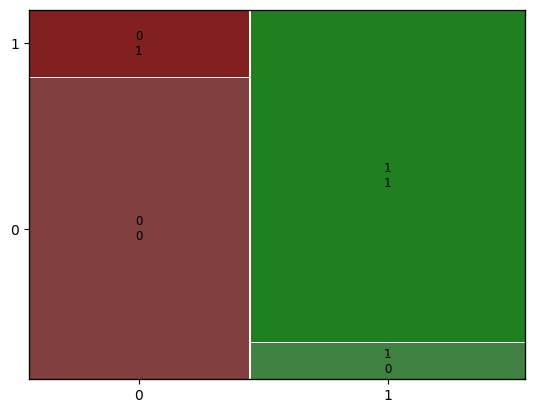

In [23]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

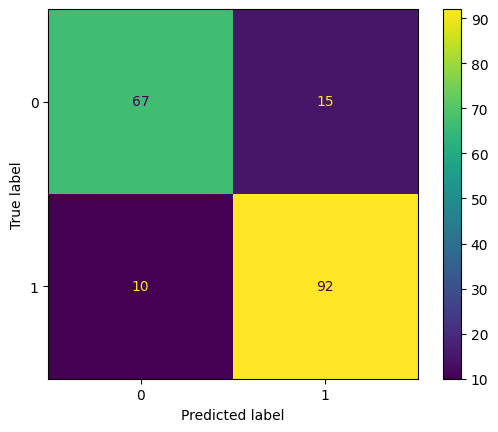

In [24]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

<Axes: >

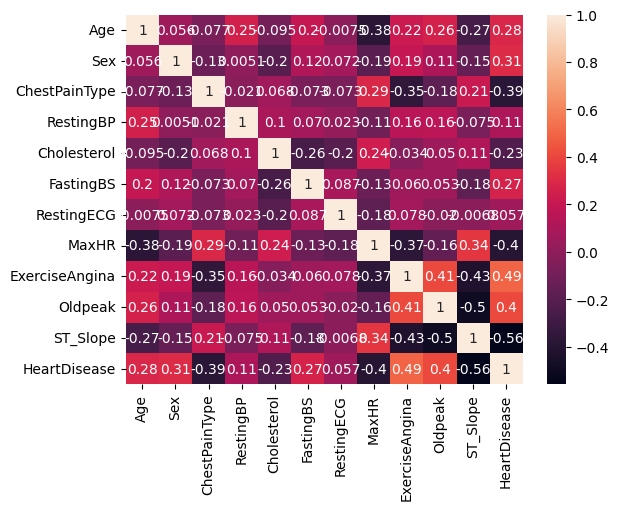

In [25]:
sns.heatmap(df.corr(), annot=True)

In [26]:
def precision_and_recall(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    """
    This function produces precision or recall based on
    what is passed in
    """
    if calc_type == "precision":
        value = tp / (tp + fp)
        # false positive are where we predicted someone would have a 
        # condition and they actually dont
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn) 
        # false negatives are where we predicted someone would not have a 
        # condition and they actually do
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg

In [27]:
precision_and_recall("precision", 27, 82, 18, 27)

0.6

In [28]:
precision_and_recall("recall", 27, 82, 18, 27)

0.5

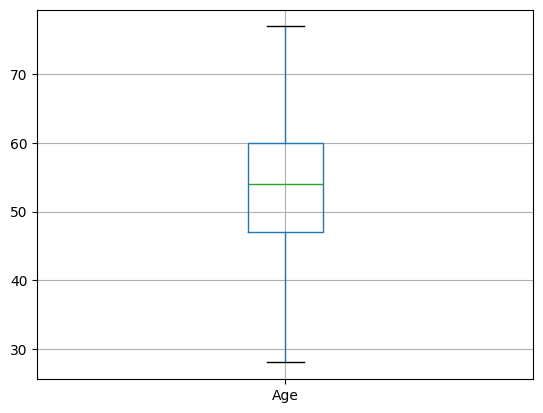

In [29]:
#KNN
boxplot = df.boxplot(column = ['Age'], return_type='axes')

In [30]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0]
<class 'numpy.ndarray'>


In [31]:
print(knn.score(X_test, y_test))

0.855072463768116


In [32]:
model =tree.DecisionTreeClassifier(max_depth=7, random_state=42)

In [33]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       112
           1       0.81      0.77      0.79       164

    accuracy                           0.76       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.76      0.76      0.76       276



In [35]:
pred_df = pd.DataFrame(X_test, columns = df.columns[0:11])


pred_df['Actual_HeartDisease'] = y_test.tolist()
pred_df['Predicted_HeartDisease'] = y_pred.tolist()
pred_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Actual_HeartDisease,Predicted_HeartDisease
0,1.038539,-2.236068,0.136996,0.492132,0.044243,-0.610847,0.028839,1.558252,-0.807895,-0.871837,1.023091,0,0
1,-0.031800,0.447214,1.132019,0.766978,2.841543,-0.610847,0.028839,-0.240928,-0.807895,-0.871837,-0.554412,1,0
2,1.252607,0.447214,-0.858027,1.591514,-1.644529,1.637071,1.620761,-0.534672,-0.807895,0.367444,-0.554412,1,1
3,0.289302,0.447214,-0.858027,-0.057558,-1.644529,-0.610847,-1.563083,-0.534672,1.237784,0.160897,-0.554412,1,1
4,0.075234,0.447214,0.136996,-1.266878,1.031525,-0.610847,0.028839,0.713739,-0.807895,-0.871837,1.023091,0,0
5,1.466675,0.447214,-0.858027,-0.332404,0.555205,1.637071,0.028839,0.970765,-0.807895,-0.665290,-0.554412,1,1
6,0.289302,0.447214,-0.858027,-0.607249,-1.644529,-0.610847,1.620761,0.419995,-0.807895,-0.871837,-0.554412,1,1
7,1.680743,0.447214,1.132019,0.602071,0.702431,-0.610847,-1.563083,-0.387800,-0.807895,-0.562017,1.023091,0,0
8,-0.781037,0.447214,2.127041,0.492132,0.711092,1.637071,0.028839,1.411380,-0.807895,1.193631,-0.554412,1,1
9,0.503370,0.447214,-0.858027,-0.607249,-1.644529,-0.610847,-1.563083,-1.122160,1.237784,0.677264,-2.131916,1,1


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[ 83,  29],
       [ 37, 127]])

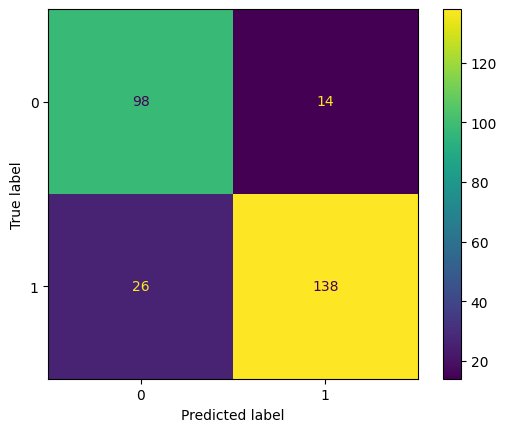

In [37]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC = Receiving Operating Characteristic curve
# ROC curves summarize the trade-off between true positives
# and false positives. They are most appropriate for balanced
# datasets. Can be overly optimistic for severely 
# imbalanced classification problems

print(type(y_test))
print(type(y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)
auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.25892857 1.        ] [0.         0.77439024 1.        ]


np.float64(0.7577308362369338)

Text(0, 0.5, 'True Positive Rate')

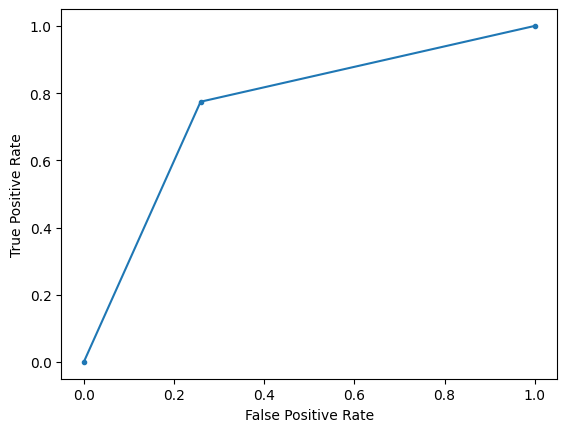

In [39]:
plt.plot(fpr, tpr, marker = ".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [40]:
#precision-recall curve summarizes the tradeoff between true

In [41]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [43]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [44]:
y_pred = model.predict(X_test)

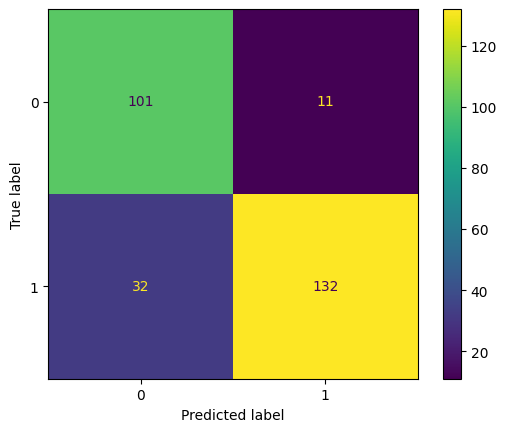

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [46]:
#recall

In [47]:
model =tree.DecisionTreeClassifier(max_depth=7, random_state=42)

In [48]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       112
           1       0.81      0.77      0.79       164

    accuracy                           0.76       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.76      0.76      0.76       276



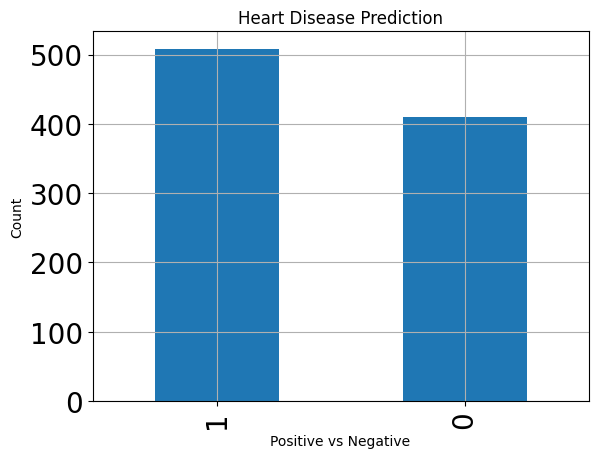

In [50]:
embarked_count= df["HeartDisease"].value_counts()

embarked_count.plot(kind="bar")
plt.xlabel('Positive vs Negative')
plt.ylabel('Count')
plt.title('Heart Disease Prediction')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()